In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  
password = getpass.getpass()

········


In [2]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)


query_rental = '''select i.film_id, r.rental_id, r.rental_date, r.customer_id, p.payment_id, p.amount
from inventory i
join rental r
on i.inventory_id = r.inventory_id
join payment p
on r.rental_id = p.rental_id;'''

sakila = pd.read_sql_query(query_rental, engine)
sakila.head(10)

,film_id,rental_id,rental_date,customer_id,payment_id,amount
0,1,4863,2005-07-08 19:03:15,431,11630,0.99
1,1,11433,2005-08-02 20:13:10,518,13956,3.99
2,1,14714,2005-08-21 21:27:43,279,7578,3.99
3,1,972,2005-05-30 20:21:07,411,11124,1.99
4,1,2117,2005-06-17 20:24:00,170,4607,0.99
5,1,4187,2005-07-07 10:41:31,161,4381,0.99
6,1,9449,2005-07-30 22:02:34,581,15579,1.99
7,1,15453,2005-08-23 01:01:01,359,9707,1.99
8,1,10126,2005-07-31 21:36:07,39,1088,0.99
9,1,15421,2005-08-22 23:56:37,541,14575,0.99


In [23]:
sakila['month'] = pd.DatetimeIndex(sakila['rental_date']).month
sakila.head()
sakila['year'] = pd.DatetimeIndex(sakila['rental_date']).year
sakila.head()

,film_id,rental_id,rental_date,customer_id,payment_id,amount,month,year
0,1,4863,2005-07-08 19:03:15,431,11630,0.99,7,2005
1,1,11433,2005-08-02 20:13:10,518,13956,3.99,8,2005
2,1,14714,2005-08-21 21:27:43,279,7578,3.99,8,2005
3,1,972,2005-05-30 20:21:07,411,11124,1.99,5,2005
4,1,2117,2005-06-17 20:24:00,170,4607,0.99,6,2005


In [28]:
sakila[sakila.month.isin([5])&(sakila.year.isin([2005]))]

,film_id,rental_id,rental_date,customer_id,payment_id,amount,month,year
3,1,972,2005-05-30 20:21:07,411,11124,1.99,5,2005
12,1,361,2005-05-27 07:03:28,587,15710,0.99,5,2005
34,3,1033,2005-05-31 04:50:07,25,657,2.99,5,2005
45,4,995,2005-05-31 00:06:02,150,4086,3.99,5,2005
55,4,465,2005-05-27 20:44:36,261,7045,3.99,5,2005
...,...,...,...,...,...,...,...,...
15991,998,873,2005-05-30 05:15:20,375,10154,2.99,5,2005
16008,999,871,2005-05-30 05:01:30,303,8218,2.99,5,2005
16024,1000,1084,2005-05-31 11:10:17,12,304,4.99,5,2005
16032,1000,582,2005-05-28 11:33:46,198,5357,4.99,5,2005


In [29]:
sakila.isna().sum()

film_id        0
rental_id      0
rental_date    0
customer_id    0
payment_id     0
amount         0
month          0
year           0
dtype: int64

In [30]:
sakila.dtypes

film_id                 int64
rental_id               int64
rental_date    datetime64[ns]
customer_id             int64
payment_id              int64
amount                float64
month                   int64
year                    int64
dtype: object

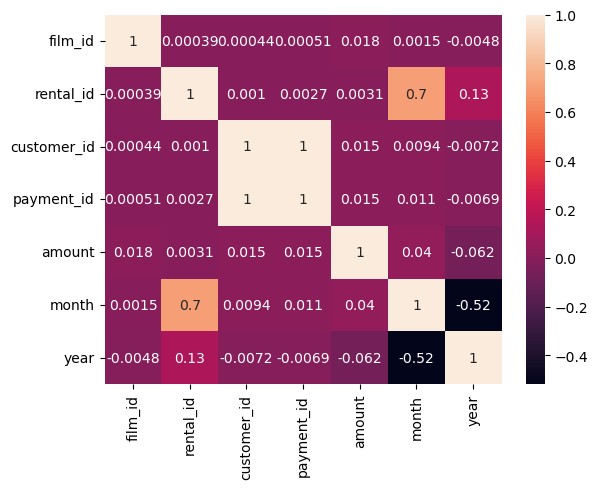

In [31]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

correlations_matrix = sakila.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [40]:
sakila2=sakila.drop(['rental_date', 'year','film_id'], axis=1)

In [41]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_num = sakila2.select_dtypes(include = np.number)
X_cat = sakila2.select_dtypes(include = object)

# Scaling data
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized, columns=X_num.columns)
x_norm.head()


,rental_id,customer_id,payment_id,amount,month
0,0.302966,0.719064,0.724639,0.082569,0.833333
1,0.712363,0.864548,0.869579,0.332777,1.000000
2,0.916812,0.464883,0.472146,0.332777,1.000000
3,0.060506,0.685619,0.693108,0.165972,0.500000
4,0.131854,0.282609,0.287014,0.082569,0.666667


In [43]:
y = sakila2['month']
X = sakila2.drop('month', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [45]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm

,rental_id,customer_id,payment_id,amount
0,0.408774,0.881271,0.885842,0.082569
1,0.386092,0.994983,0.994890,0.416180
2,0.475698,0.688963,0.696473,0.082569
3,0.941800,0.053512,0.057640,0.249374
4,0.096959,0.732441,0.737288,0.082569
...,...,...,...,...
12830,0.623380,0.757525,0.764457,0.332777
12831,0.946037,0.446488,0.453141,0.249374
12832,0.838671,0.683946,0.692360,0.416180
12833,0.776919,0.394649,0.399427,0.082569


In [46]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_id,customer_id,payment_id,amount
0,0.408774,0.881271,0.885842,0.082569
1,0.386092,0.994983,0.994890,0.416180
2,0.475698,0.688963,0.696473,0.082569
3,0.941800,0.053512,0.057640,0.249374
4,0.096959,0.732441,0.737288,0.082569


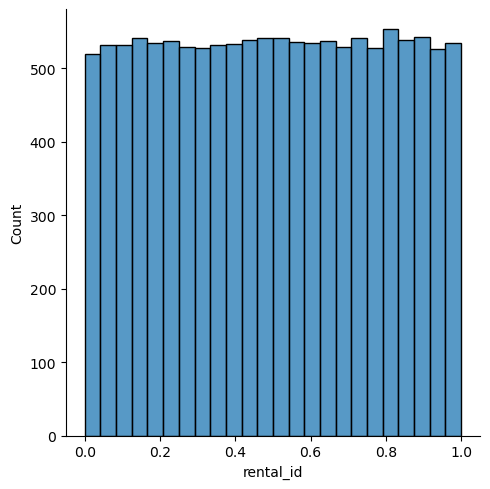

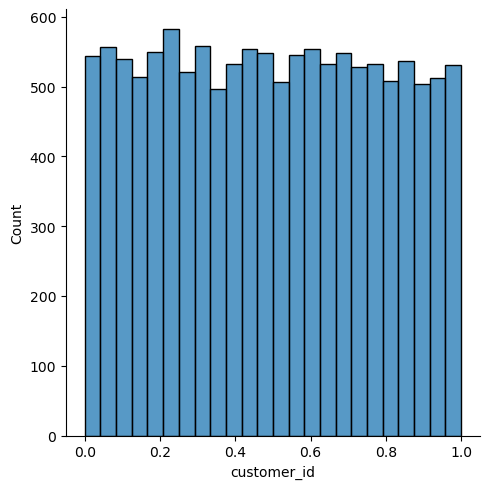

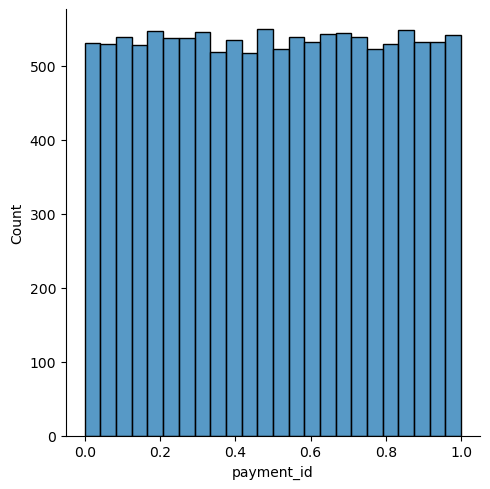

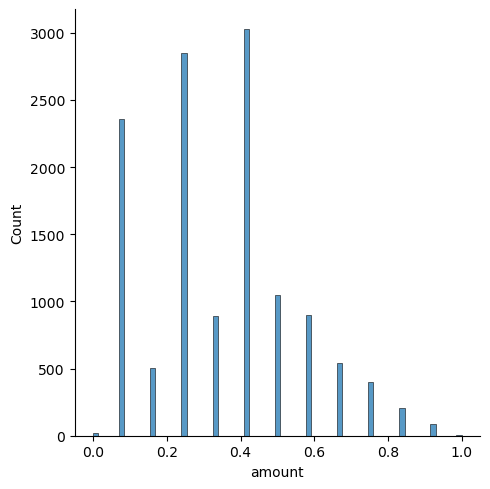

In [50]:
sns.displot(X_train_norm['rental_id'])
plt.show()

sns.displot(X_train_norm['customer_id'])
plt.show()

sns.displot(X_train_norm['payment_id'])
plt.show()

sns.displot(X_train_norm['amount'])
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_normalized, y_train)

C:\Users\joanv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_normalized, y_train)

In [58]:
X_test_num = X_test.select_dtypes(include = np.number)

In [59]:
transformer = MinMaxScaler().fit(X_train_num)
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)
X_test_norm.head()

,0,1,2,3
0,0.399115,0.653846,0.661952,0.249374
1,0.312562,0.401338,0.405533,0.249374
2,0.991463,0.381271,0.385282,0.249374
3,0.366588,0.831104,0.836117,0.082569
4,0.589606,0.586957,0.593407,0.082569


In [60]:
predictions = classification.predict(X_test_normalized)
predictions

array([7, 7, 8, ..., 7, 7, 8], dtype=int64)

In [61]:
classification.score(X_test_normalized, y_test)

0.9716422561545652

In [62]:
print(y_test.value_counts())

7    1354
8    1116
6     462
5     243
2      34
Name: month, dtype: int64


In [63]:
pd.Series(predictions).value_counts()

7    1380
8    1142
6     473
5     214
dtype: int64

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[   0,    0,    0,    0,   34],
       [   0,  214,   29,    0,    0],
       [   0,    0,  444,   18,    0],
       [   0,    0,    0, 1353,    1],
       [   0,    0,    0,    9, 1107]], dtype=int64)

In [66]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train_normalized, y_train)


KNeighborsClassifier(n_neighbors=3)

In [69]:
predictions_clf = clf.predict(X_test_normalized)
clf.score(X_test_normalized, y_test)

C:\Users\joanv\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\joanv\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.954814583982549

In [70]:
confusion_matrix(y_test, predictions_clf)

array([[   0,    0,    0,    0,   34],
       [   0,  230,   13,    0,    0],
       [   0,   20,  423,   19,    0],
       [   0,    0,   20, 1312,   22],
       [   3,    0,    0,   14, 1099]], dtype=int64)

In [71]:
pd.Series(y_test).value_counts()

7    1354
8    1116
6     462
5     243
2      34
Name: month, dtype: int64

In [72]:
pd.Series(predictions_clf).value_counts()

7    1345
8    1155
6     456
5     250
2       3
dtype: int64